In [140]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy
from scipy.stats import norm
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [6]:
def load_house_data():
    data = np.loadtxt("./houses.txt", delimiter=",", skiprows=1)
    X = data[:, :4]
    y = data[:, 4]
    return X, y

In [18]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']

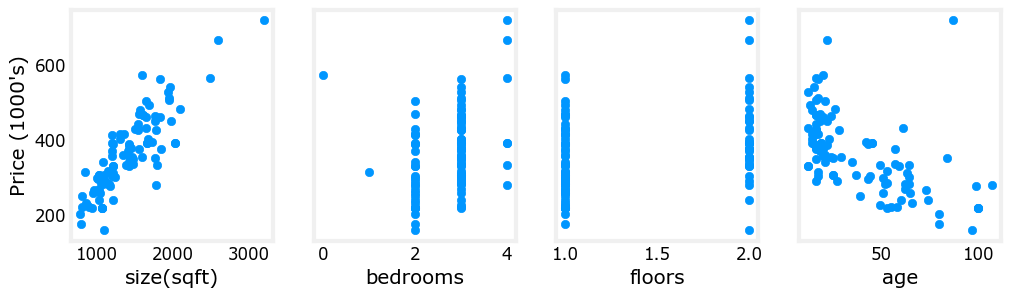

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()


In [25]:
def predict(X, w, b):
    return X @ w + b

In [27]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    f_wb = X @ w + b
    cost = (1/(2*m)) * np.sum((f_wb-y)**2)
    return np.squeeze(cost)

In [37]:
def compute_gradient_matrix(X, y, w, b): 
    m = X.shape[0]
    f_wb = X @ w + b              
    e   = f_wb - y                
    dj_dw  = (1/m) * (X.T @ e)    
    dj_db  = (1/m) * np.sum(e)    
        
    return dj_db,dj_dw

In [31]:
# dj_db, dj_dw = compute_gradient(X_train, y_train, np.zeros(X_train.shape[1]), 0.)
# print(dj_dw)

In [38]:
def gradient_descent_houses(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    m = len(X)
    hist = {}
    hist["cost"]=[]; hist["params"]=[]; hist["grads"]=[]; hist["iter"]=[]
    w = copy.deepcopy(w_in) # avoid modifying global w within function
    b = b_in
    save_interval = math.ceil(num_iters/10000) # prevent resource exhaustion for long runs

    print(f"Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  ")
    print(f"---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|")

    for i in range(num_iters):
        dj_db,dj_dw = gradient_function(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J,w,b at each save interval for graphing
        if i == 0 or i % save_interval == 0: # if i == 0 check is redundant here. But shows intent.
            hist["cost"].append(cost_function(X, y, w, b))
            hist["params"].append([w, b])
            hist["grads"].append([dj_dw,dj_db])
            hist["iter"].append(i)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters/10) == 0:  
            cst = cost_function(X, y, w, b)
            print(f"{i:9d} {cst:0.5e} {w[0]: 0.1e} {w[1]: 0.1e} {w[2]: 0.1e} {w[3]: 0.1e} {b: 0.1e} {dj_dw[0]: 0.1e} {dj_dw[1]: 0.1e} {dj_dw[2]: 0.1e} {dj_dw[3]: 0.1e} {dj_db: 0.1e}")

    return w, b, hist

In [39]:
def run_gradient_descent(X,y, alpha = 1e-6, iterations=1000):
    m, n = X.shape
    w_init = np.zeros(n)
    b_init = 0
    w_out, b_out, hist_out = gradient_descent_houses(X, y, w_init, b_init, compute_cost, compute_gradient_matrix, alpha, iterations)
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.2f}")
    return(w_out, b_out, hist_out)


In [114]:
#set alpha to 9.9e-7
_, _, hist = run_gradient_descent(X_train, y_train, alpha = 9.9e-7, iterations=10)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 9.55884e+04  5.5e-01  1.0e-03  5.1e-04  1.2e-02  3.6e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 1.28213e+05 -8.8e-02 -1.7e-04 -1.0e-04 -3.4e-03 -4.8e-05  6.4e+05  1.2e+03  6.2e+02  1.6e+04  4.1e+02
        2 1.72159e+05  6.5e-01  1.2e-03  5.9e-04  1.3e-02  4.3e-04 -7.4e+05 -1.4e+03 -7.0e+02 -1.7e+04 -4.9e+02
        3 2.31358e+05 -2.1e-01 -4.0e-04 -2.3e-04 -7.5e-03 -1.2e-04  8.6e+05  1.6e+03  8.3e+02  2.1e+04  5.6e+02
        4 3.11100e+05  7.9e-01  1.4e-03  7.1e-04  1.5e-02  5.3e-04 -1.0e+06 -1.8e+03 -9.5e+02 -2.3e+04 -6.6e+02
        5 4.18517e+05 -3.7e-01 -7.1e-04 -4.0e-04 -1.3e-02 -2.1e-04  1.2e+06  2.1e+03  1.1e+03  2.8e+04  7.5e+02
        6 5.63212e+05  9.7e-01  1.7e-03  8.7e-04  1.8e-02  6.6e-04 -1.3e+06 -2.5e+03 -1.3e+03 -3.1e+04 -

In [113]:
def plot_cost_i_w(X,y,hist):
    ws = np.array([p[0] for p in hist['params']])
    rng = max(abs(ws[:,0].min()), abs(ws[:,0].max()))
    # wr = np.linspace(-rng+(0.15 * rng), rng+(0.15 * rng), 20)
    wr = np.linspace(-rng+0.27, rng+0.27, 20)
    cst = [compute_cost(X, y, np.array([w, -32, -67, -1.46]), 221) for w in wr]

    fig, ax = plt.subplots(1,2, figsize=(12,3))
    ax[0].plot(hist["iter"], hist["cost"])
    ax[0].set_title("Cost vs Iteration"); ax[0].set_ylabel("Cost"); ax[0].set_xlabel("Iteration")
    ax[1].plot(wr, cst)
    ax[1].set_title("Cost vs w[0]"); ax[1].set_ylabel("Cost"); ax[1].set_xlabel("w[0]")
    ax[1].plot(ws[:,0], hist["cost"])
    plt.show()

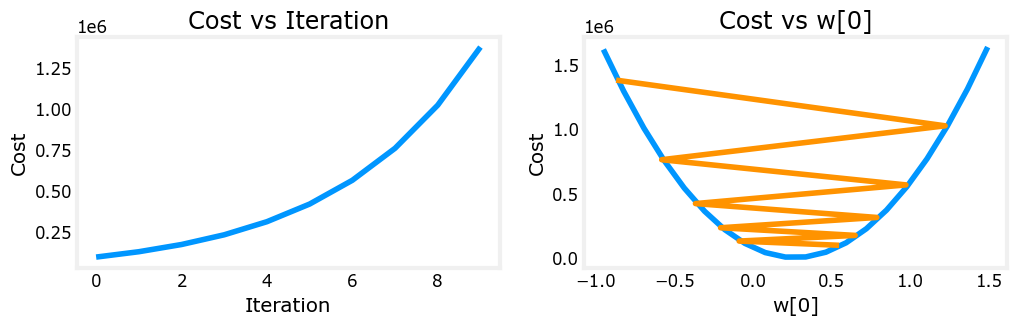

In [115]:
plot_cost_i_w(X_train, y_train, hist)

In [121]:
#set alpha to 9e-7
_,_,hist = run_gradient_descent(X_train, y_train, alpha = 9e-7, iterations=10)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.64616e+04  5.0e-01  9.1e-04  4.7e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 6.18990e+04  1.8e-02  2.1e-05  2.0e-06 -7.9e-04  1.9e-05  5.3e+05  9.8e+02  5.2e+02  1.3e+04  3.4e+02
        2 5.76572e+04  4.8e-01  8.6e-04  4.4e-04  9.5e-03  3.2e-04 -5.1e+05 -9.3e+02 -4.8e+02 -1.1e+04 -3.4e+02
        3 5.37137e+04  3.4e-02  3.9e-05  2.8e-06 -1.6e-03  3.8e-05  4.9e+05  9.1e+02  4.8e+02  1.2e+04  3.2e+02
        4 5.00474e+04  4.6e-01  8.2e-04  4.1e-04  8.0e-03  3.2e-04 -4.8e+05 -8.7e+02 -4.5e+02 -1.1e+04 -3.1e+02
        5 4.66388e+04  5.0e-02  5.6e-05  2.5e-06 -2.4e-03  5.6e-05  4.6e+05  8.5e+02  4.5e+02  1.2e+04  2.9e+02
        6 4.34700e+04  4.5e-01  7.8e-04  3.8e-04  6.4e-03  3.2e-04 -4.4e+05 -8.1e+02 -4.2e+02 -9.8e+03 -

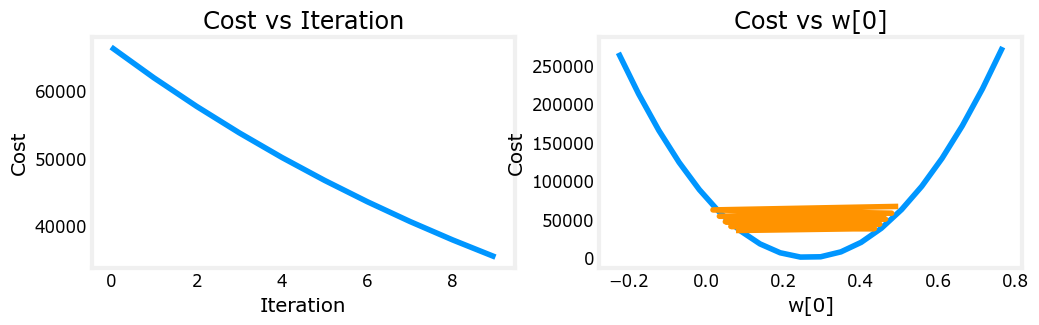

In [122]:
plot_cost_i_w(X_train, y_train, hist)

In [123]:
#set alpha to 1e-7
_,_,hist = run_gradient_descent(X_train, y_train, alpha = 1e-7, iterations=10)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.42313e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 2.76461e+04  9.8e-02  1.8e-04  9.2e-05  2.2e-03  6.5e-05 -4.3e+05 -7.9e+02 -4.0e+02 -9.5e+03 -2.8e+02
        2 1.75102e+04  1.3e-01  2.4e-04  1.2e-04  2.9e-03  8.7e-05 -3.4e+05 -6.1e+02 -3.1e+02 -7.3e+03 -2.2e+02
        3 1.13157e+04  1.6e-01  2.9e-04  1.5e-04  3.5e-03  1.0e-04 -2.6e+05 -4.8e+02 -2.4e+02 -5.6e+03 -1.8e+02
        4 7.53002e+03  1.8e-01  3.3e-04  1.7e-04  3.9e-03  1.2e-04 -2.1e+05 -3.7e+02 -1.9e+02 -4.2e+03 -1.4e+02
        5 5.21639e+03  2.0e-01  3.5e-04  1.8e-04  4.2e-03  1.3e-04 -1.6e+05 -2.9e+02 -1.5e+02 -3.1e+03 -1.1e+02
        6 3.80242e+03  2.1e-01  3.8e-04  1.9e-04  4.5e-03  1.4e-04 -1.3e+05 -2.2e+02 -1.1e+02 -2.3e+03 -

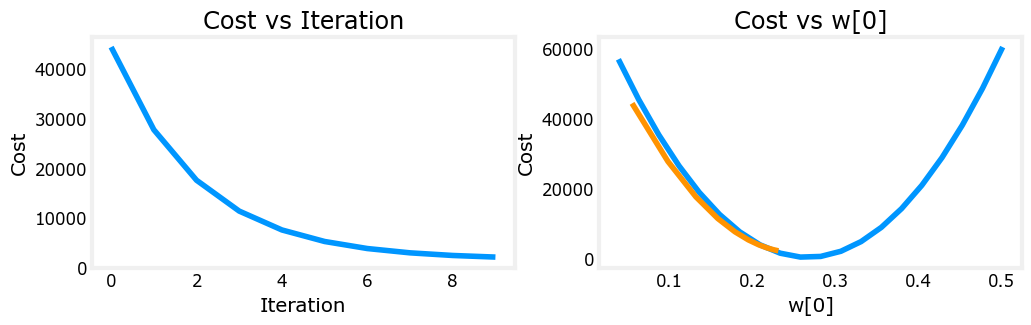

In [124]:
plot_cost_i_w(X_train,y_train,hist)

In [125]:
def zscore_normalize_features(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu)/sigma
    return (X_norm, mu, sigma)

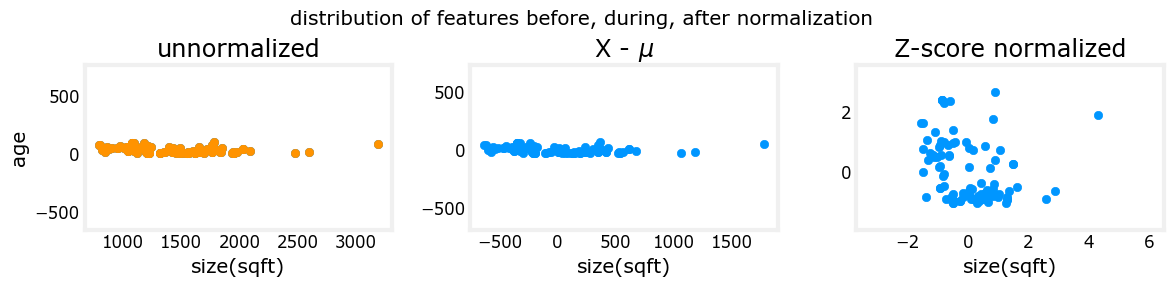

In [136]:
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)
X_mean = X_train - mu
X_norm = (X_train - mu) / sigma

fig, ax = plt.subplots(1, 3, figsize=(12,3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0,0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [137]:
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, X_sigma = {X_sigma}")
print(f"Peak to Peak by column in Raw        X: {np.ptp(X_train, axis=0)}")
print(f"Peak to Peak by column in Normalized X: {np.ptp(X_norm, axis=0)}")

X_mu = [1.41837374e+03 2.71717172e+00 1.38383838e+00 3.83838384e+01], X_sigma = [411.61562893   0.65196523   0.48631932  25.77788069]
Peak to Peak by column in Raw        X: [2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak by column in Normalized X: [5.8452591  6.13529646 2.05626214 3.68533012]


In [ ]:
def norm_plot(ax, data):
    scale = (np.max(data) - np.min(data)) * 0.2
    x = np.linspace(np.min(data)-scale, np.max(data)+scale, 50)
    _, bins, _ = ax.hist(data, x, color="xkcd:azure")

    mu = np.mean(data)
    std = np.std(data)
    dist = norm.pdf(bins, loc=mu, scale=std)

    axr = ax.twinx()
    axr.plot(bins, dist, color = "orangered", lw=2)
    # axr.set_ylim(bottom=0)
    # axr.axis('off')

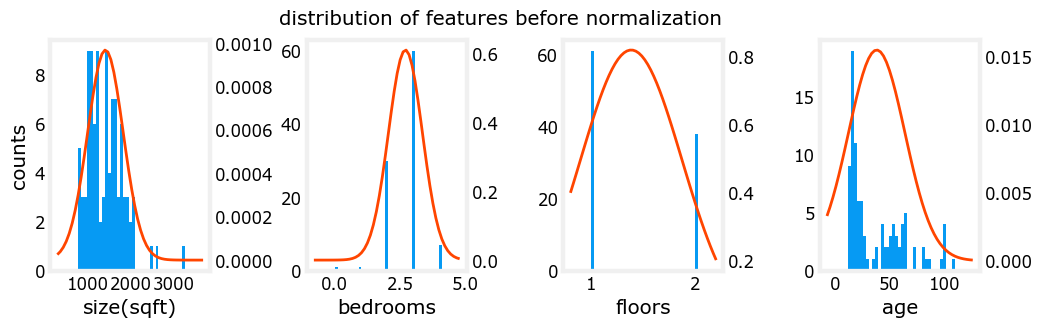

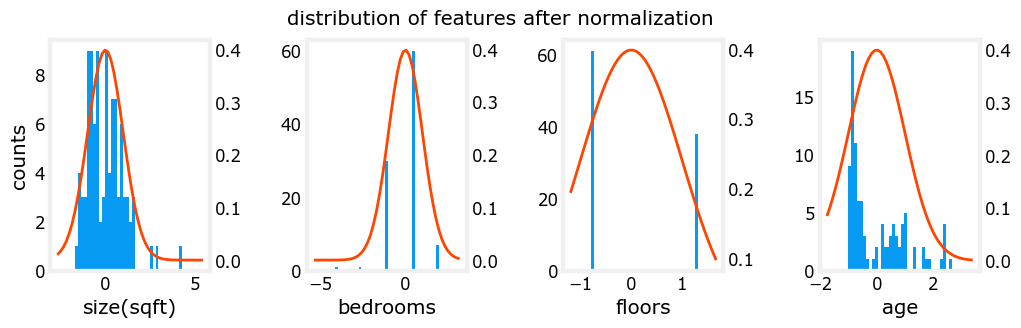

In [156]:
fig, ax = plt.subplots(1, 4, figsize=(12,3))
plt.subplots_adjust(wspace=0.6) 
for i in range(len(ax)):
    norm_plot(ax[i], X_train[:, i])
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("counts")
fig.suptitle("distribution of features before normalization")
plt.show()
fig, ax = plt.subplots(1, 4, figsize=(12,3))
plt.subplots_adjust(wspace=0.6) 
for i in range(len(ax)):
    norm_plot(ax[i], X_norm[:, i])
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("counts")
fig.suptitle("distribution of features after normalization")
plt.show()

In [157]:
w_norm, b_norm, hist = run_gradient_descent(X_norm, y_train, 1.0e-1, 1000)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.76170e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21086e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.2e-01  4.5e-01  5.3e-01 -1.7e-01 -9.6e-03
      200 2.19209e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.0e-02  1.5e-02  1.7e-02 -6.0e-03 -2.6e-07
      300 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.0e-03  5.1e-04  5.7e-04 -2.0e-04 -6.9e-12
      400 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.4e-05  1.7e-05  1.9e-05 -6.6e-06 -2.7e-13
      500 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.1e-06  5.6e-07  6.2e-07 -2.2e-07 -2.6e-13
      600 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.7e-08  1.9e-08  2.1e-08 -7.3e-09 -

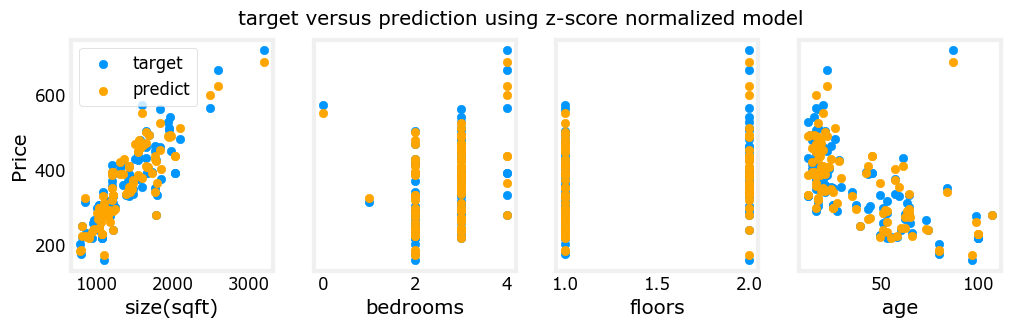

In [159]:
m = X_norm.shape[0]
f_wb_norm = X_norm @ w_norm + b_norm
fig, ax = plt.subplots(1, 4, figsize=(12,3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label='target')
    ax[i].scatter(X_train[:, i], f_wb_norm, label='predict', color='orange')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [160]:
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house-X_mu)/X_sigma
print(x_house_norm)
x_house_pred = np.dot(x_house_norm, w_norm) + b_norm
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_pred*1000:0.0f}")

[-0.53052829  0.43380884 -0.78927234  0.06269567]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318709


In [162]:
    # plots p1 vs p2. Prange is an array of entries [min, max, steps]. In feature scaling lab.
def plt_contour_multi(x, y, w, b, ax, prange, p1, p2, title="", xlabel="", ylabel=""): 
    contours = [1e2, 2e2,3e2,4e2, 5e2, 6e2, 7e2,8e2,1e3, 1.25e3,1.5e3, 1e4, 1e5, 1e6, 1e7]
    px,py = np.meshgrid(np.linspace(*(prange[p1])),np.linspace(*(prange[p2])))
    z=np.zeros_like(px)
    n,_ = px.shape
    for i in range(px.shape[0]):
        for j in range(px.shape[1]):
            w_ij = w
            b_ij = b
            if p1 <= 3: w_ij[p1] = px[i,j]
            if p1 == 4: b_ij = px[i,j]
            if p2 <= 3: w_ij[p2] = py[i,j]
            if p2 == 4: b_ij = py[i,j]
                
            z[i][j] = compute_cost(x, y, w_ij, b_ij )
    CS = ax.contour(px, py, z, contours, linewidths=2,
                   # colors=[dlblue, dlorange, dldarkred, dlmagenta, dlpurple]
                   ) 
    ax.clabel(CS, inline=1, fmt='%1.2e', fontsize=10)
    ax.set_xlabel(xlabel);  ax.set_ylabel(ylabel)
    ax.set_title(title, fontsize=14)


def plt_equal_scale(X_train, X_norm, y_train):
    fig,ax = plt.subplots(1,2,figsize=(12,5))
    prange = [
              [ 0.238-0.045, 0.238+0.045,  50],
              [-25.77326319-0.045, -25.77326319+0.045, 50],
              [-50000, 0,      50],
              [-1500,  0,      50],
              [0, 200000, 50]]
    w_best = np.array([0.23844318, -25.77326319, -58.11084634,  -1.57727192])
    b_best = 235
    plt_contour_multi(X_train, y_train, w_best, b_best, ax[0], prange, 0, 1, 
                      title='Unnormalized, J(w,b), vs w[0],w[1]',
                      xlabel= "w[0] (size(sqft))", ylabel="w[1] (# bedrooms)")
    #
    w_best = np.array([111.1972, -16.75480051, -28.51530411, -37.17305735])
    b_best = 376.949151515151
    prange = [[ 111-50, 111+50,   75],
              [-16.75-50,-16.75+50, 75],
              [-28.5-8, -28.5+8,  50],
              [-37.1-16,-37.1+16, 50],
              [376-150, 376+150, 50]]
    plt_contour_multi(X_norm, y_train, w_best, b_best, ax[1], prange, 0, 1, 
                      title='Normalized, J(w,b), vs w[0],w[1]',
                      xlabel= "w[0] (normalized size(sqft))", ylabel="w[1] (normalized # bedrooms)")
    fig.suptitle("Cost contour with equal scale", fontsize=18)
    #plt.tight_layout(rect=(0,0,1.05,1.05))
    fig.tight_layout(rect=(0,0,1,0.95))
    plt.show()

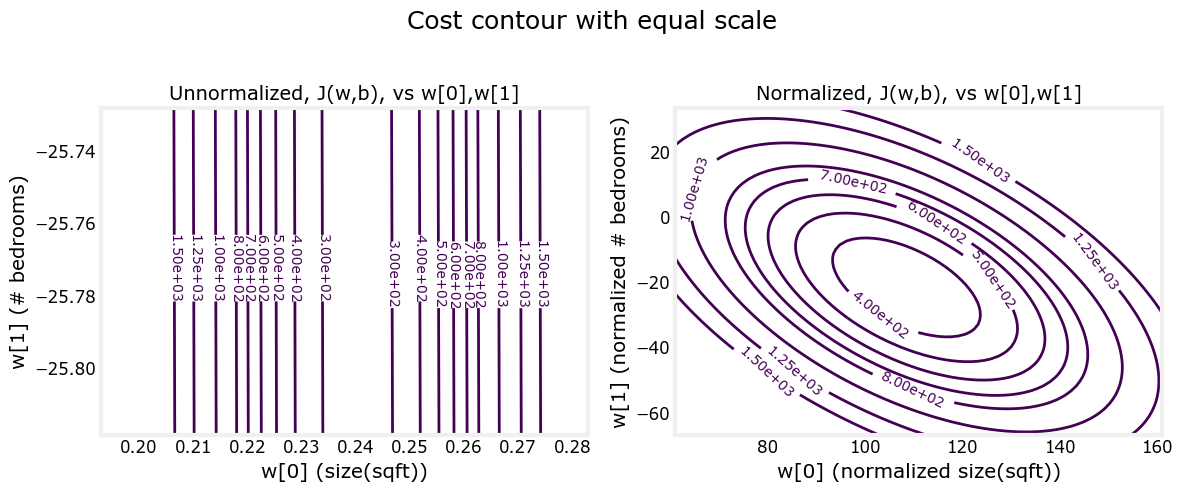

In [163]:
plt_equal_scale(X_train, X_norm, y_train)